In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## The matrix inverse

In [2]:
A = np.array([[1,4], [2,7]])

Ainv = np.linalg.inv(A)

A@Ainv

array([[1., 0.],
       [0., 1.]])

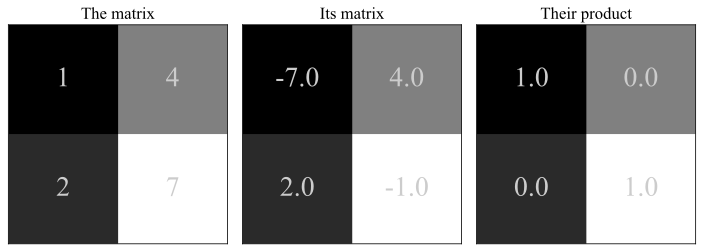

In [6]:
fig, axs = plt.subplots(1,3, figsize=(10,6))

axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j, i), num in np.ndenumerate(A):
    axs[0].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

axs[1].imshow(A,cmap='gray')
axs[1].set_title('Its matrix')
for (j, i), num in np.ndenumerate(Ainv):
    axs[1].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28) # 결과 : 실수(역행렬 계산 결과에 행렬식이 분수로 곱해지기 때문)

# their product
AAi = A@Ainv
axs[2].imshow(A,cmap='gray')
axs[2].set_title('Their product')
for (j, i), num in np.ndenumerate(AAi):
    axs[2].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

# common properties
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_01.png', dpi=600)
plt.show()